
# Technika regulacji - Sprawozdanie 1

**Iwo Chwiszczuk 280043, Szymon Flis 280153**  
---


### Zadanie 1

In [ ]:
import sympy as sp
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing()

A, B = 3, 3
C = A + B
t, s = sp.symbols('t, s')
f1_t = A * t * sp.exp(-B * t)
f2_t = A - sp.exp(-2*t) * (sp.sin(t - B) - sp.cos(t - B) 
                            + sp.sin(t - C) * sp.cos(t - C))
F1_s = sp.laplace_transform(f1_t, t, s, noconds=True).simplify()
F2_s = sp.laplace_transform(f2_t, t, s, noconds=True).simplify()


In [6]:
[f1_t, f2_t]

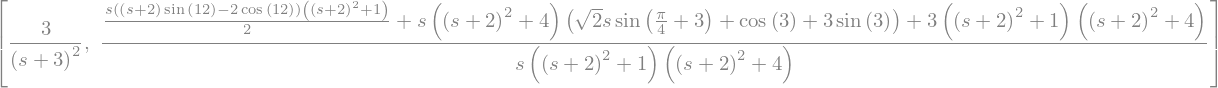

In [7]:
[F1_s, F2_s]

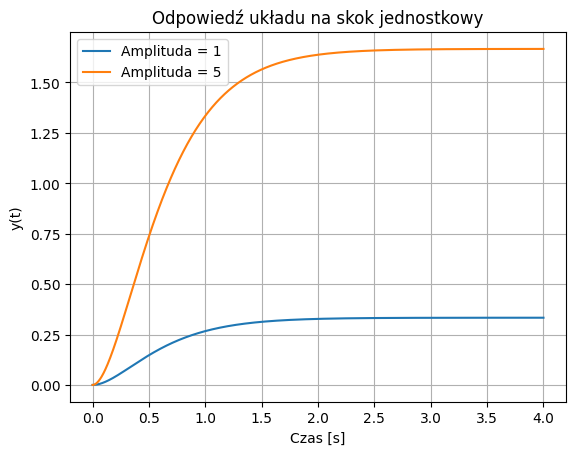

In [8]:
L_s, M_s = sp.fraction(F1_s)
num_coeffs = [float(c) for c in sp.Poly(L_s, s).all_coeffs()]
den_coeffs = [float(c) for c in sp.Poly(M_s, s).all_coeffs()]

K_s = ctrl.TransferFunction(num_coeffs, den_coeffs)

T = np.linspace(0, 4, 1200)
for A_step in [1, 5]:
    T, y_t = ctrl.step_response(A_step * K_s, T)
    plt.plot(T, y_t, label=f"Amplituda = {A_step}")

plt.title("Odpowiedź układu na skok jednostkowy")
plt.xlabel("Czas [s]")
plt.ylabel("y(t)")
plt.legend()
plt.grid()
plt.show()